In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [2]:
text_file = open("AIerror_ONU16_15S_Ai.txt","r")

In [3]:
lines   = text_file.readlines()
X_train = []
Y_train = []
X_test  = []
Y_test  = []
g       = []
BufferSize = []

In [4]:
timesteps_ = 50

In [5]:
for i in range(len(lines)):
	g.append(float(lines[i]))
for i in range(len(g)):
	if g[i] >= 0:
		BufferSize.append(g[i])

print('max(X_train)  : ',max(BufferSize))
print('min(X_train)  : ',min(BufferSize))

# for i in range(len(BufferSize)):
# 	BufferSize[i] = (BufferSize[i]-min(BufferSize))/max(BufferSize)

max(X_train)  :  624990.0
min(X_train)  :  0.0


In [6]:
[0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142]

[0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142]

In [7]:
BufferSize = np.array(BufferSize)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = np.reshape(BufferSize,(BufferSize.shape[0],1)) #(11591,1)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = sc.fit_transform(BufferSize)
print(BufferSize[0:10])

BufferSize.shape :  (46068,)
BufferSize.shape :  (46068, 1)
[[0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]]


In [8]:
count = int(len(BufferSize)*0.7)
test_count = int(len(BufferSize)) - count
TestSet = BufferSize[count:len(BufferSize), 0]
TestSet = np.reshape(TestSet, (TestSet.shape[0], 1))
for i in range( count - timesteps_): # Change TimeStep
	X_train.append(BufferSize[i:i+timesteps_,0])
	Y_train.append(BufferSize[i+timesteps_,0])
 
for i in range(timesteps_, len(TestSet)):
    X_test.append(TestSet[i-timesteps_:i,0])
for i in range(timesteps_, len(TestSet)):
    Y_test.append(TestSet[i,0])

print('type(X_train) : ',type(X_train))
print('X_train.shape : ',np.shape(X_train))
print('Y_train.shape : ',np.shape(Y_train))

type(X_train) :  <class 'list'>
X_train.shape :  (32197, 50)
Y_train.shape :  (32197,)


In [9]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))

In [11]:
X_test.shape

(13771, 50, 1)

In [12]:
inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=40,return_sequences = True, input_shape=(timesteps_,1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

predictions = Dense(1)(tgt4)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0156 - mse: 0.0012 - mae: 0.0156 - val_loss: 0.0167 - val_mse: 0.0021 - val_mae: 0.0167
Epoch 2/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0145 - mse: 0.0011 - mae: 0.0145 - val_loss: 0.0156 - val_mse: 0.0021 - val_mae: 0.0156
Epoch 3/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0139 - mse: 0.0011 - mae: 0.0139 - val_loss: 0.0152 - val_mse: 0.0021 - val_mae: 0.0152
Epoch 4/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0136 - mse: 0.0011 - mae: 0.0136 - val_loss: 0.0150 - val_mse: 0.0020 - val_mae: 0.0150
Epoch 5/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0133 - mse: 0.0011 - mae: 0.0133 - val_loss: 0.0146 - val_mse: 0.0020 - val_mae: 0.0146
Epoch 6/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0132 - mse: 0.0011 - mae: 0.0132 - val_loss: 0.0146 - val_mse: 0.0020 - val_mae: 0.0146
Epoch 7/1

705/705 [==============================] - 6s 9ms/step - loss: 0.0127 - mse: 0.0010 - mae: 0.0127 - val_loss: 0.0138 - val_mse: 0.0016 - val_mae: 0.0138
Epoch 51/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0126 - mse: 0.0010 - mae: 0.0126 - val_loss: 0.0139 - val_mse: 0.0014 - val_mae: 0.0139
Epoch 52/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0127 - mse: 0.0010 - mae: 0.0127 - val_loss: 0.0139 - val_mse: 0.0014 - val_mae: 0.0139
Epoch 53/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0127 - mse: 9.9860e-04 - mae: 0.0127 - val_loss: 0.0138 - val_mse: 0.0016 - val_mae: 0.0138
Epoch 54/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0127 - mse: 0.0010 - mae: 0.0127 - val_loss: 0.0141 - val_mse: 0.0018 - val_mae: 0.0141
Epoch 55/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0126 - mse: 0.0010 - mae: 0.0126 - val_loss: 0.0133 - val_mse: 0.0011 - val_mae: 0.0133
Epoch 56/100


705/705 [==============================] - 7s 9ms/step - loss: 0.0125 - mse: 9.3039e-04 - mae: 0.0125 - val_loss: 0.0140 - val_mse: 0.0017 - val_mae: 0.0140
Epoch 99/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0125 - mse: 9.5548e-04 - mae: 0.0125 - val_loss: 0.0144 - val_mse: 0.0020 - val_mae: 0.0144
Epoch 100/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0125 - mse: 9.4061e-04 - mae: 0.0125 - val_loss: 0.0142 - val_mse: 0.0020 - val_mae: 0.0142


In [13]:
 model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)           

timesteps :  50
mae  :  0.0012074639089405537


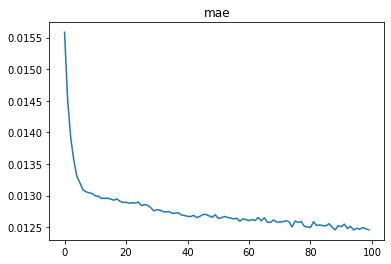

In [14]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  50


Text(0.5, 1.0, 'mse')

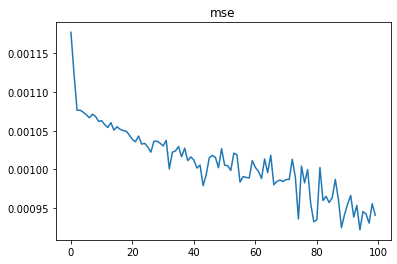

In [15]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

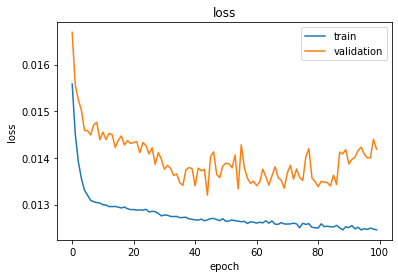

In [16]:
plt.title('loss')   #15s train data, 50 timestep
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [135]:
y_pred = model.predict(X_test) #10s train data
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 20 score: 0.332164391196034


In [17]:
y_pred = model.predict(X_test) #15s train data
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 20 score: 0.2746751642104561


In [34]:
y_pred = model.predict(X_test) #15s train data, 50
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 50 score: 0.29977544755674457


In [35]:
text_file.close()

In [40]:
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 50 score: 0.2700309978885814


In [36]:
y_pred.shape

(13771, 1)

In [37]:
Y_test.shape

(13771,)

In [17]:
X_test = []
real_value = []

period = timesteps_
end_of_TestSet = test_size

for i in range(period,end_of_TestSet):
    real_value.append(TestSet[i,0])

TestSet = sc.transform(TestSet)

for i in range(period,end_of_TestSet):
    X_test.append(TestSet[i-period:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
real_value = np.array(real_value)
predicted_output = regressor.predict(X_test)

NameError: name 'test_size' is not defined

In [ ]:
predicted_output = sc.inverse_transform(predicted_output)
plt.plot(predicted_output)
print('predicted_output.max : ',predicted_output.max(),', predicted_output.min : ',predicted_output.min() )

In [ ]:
plt.plot(real_value)
print('real_value.max : ',real_value.max(),', real_value.min : ',real_value.min())

In [ ]:
plt.plot(real_value, color='green',label='Real_value')
plt.plot(predicted_output, color='red',label='Predicted_output')
plt.title('ONU16 request')
plt.xlabel("Test Data size")
plt.ylabel("Request size")
plt.legend()
plt.show()
print('Timesteps : ',timesteps_)
print('predicted_output.max : ',predicted_output.max(),', predicted_output.min : ',predicted_output.min())
print('predicted_output.average : ',np.average(predicted_output))
print('real_value.max : ',real_value.max(),', real_value.min : ',real_value.min())
print('real_value.average : ',round(np.average(real_value),3))
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(real_value,predicted_output)
print('mse : ',round(mse1,3))
import math
from sklearn.metrics import mean_absolute_error as mae
print('rmse : ',round(math.sqrt(mse1),3))
#print('mae  : ',sum(map(lambda t:float(t[0]-t[1]),zip(predicted_output, real_value)))/len(real_value))
print('mae  : ',mae(real_value, predicted_output))